In [ ]:
using PyPlot

In [179]:
t = 2020:1.:2100;
c_00 = 415

nondim_linear(t) = (t .- t[1])/(t[end] - t[1])

nondim_linear (generic function with 1 method)

In [180]:
q = 2. .* ones(size(t));

In [181]:
c_0 = c_00 .+ cumsum(q);

In [182]:
# Example control trajectories
# (picked because cost of controls + cost of controlled damage < uncontrolled damage)
ϕ = nondim_linear(t)/8.
φ = nondim_linear(t)/8.
λ = nondim_linear(t)/8.
χ = nondim_linear(t)/8.

0.0:0.0015625:0.125

In [183]:
c = (c_0 .- cumsum(q .* φ)) .* (1. .- ϕ);

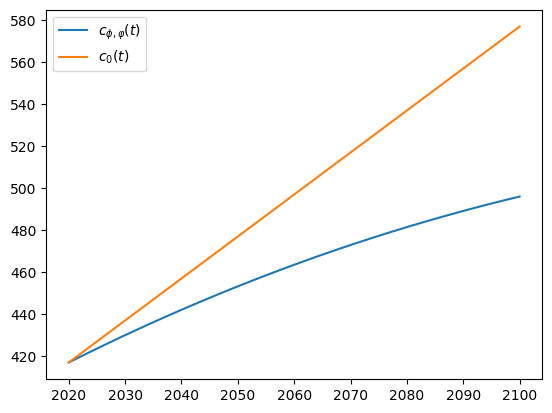

PyObject <matplotlib.legend.Legend object at 0x14d1f6c18>

In [184]:
plot(t,c, label=L"$c_{\phi,\varphi}(t)$")
plot(t,c_0, label=L"$c_{0}(t)$")
legend()

In [185]:
ECS = 3.
ϵ = ECS/log(2.)

δT_00 = 1.2;
δT_0 = δT_00 .+ ϵ.*log.(c_0/c_00);
δT = δT_00 .+ ϵ.*log.(c./c_00);

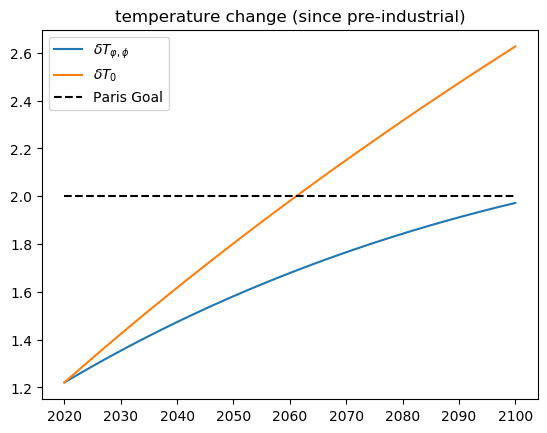

PyObject Text(0.5, 1, 'temperature change (since pre-industrial)')

In [186]:
plot(t,δT, label=L"\delta T_{\varphi,\phi}")
plot(t,δT_0, label=L"\delta T_{0}")
plot(t,2.0.*ones(size(t)),"k--", label="Paris Goal")
legend()
title("temperature change (since pre-industrial)")

In [187]:
β = 2.2 # trillion dolars / C^2
damage_cost = (1. .- χ) .* β .* δT.^2 .* (1. .- λ).^2;
damage_cost_0 = β .* δT_0.^2;

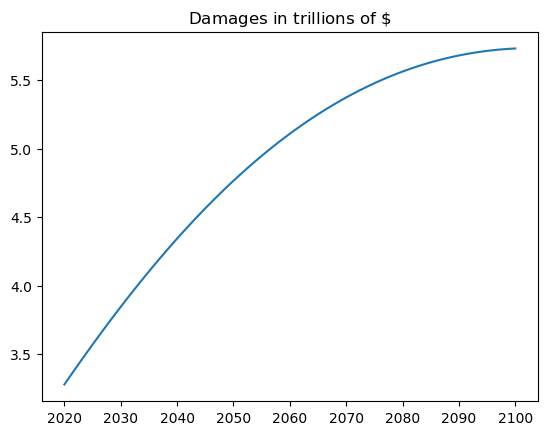

PyObject Text(0.5, 1, 'Damages in trillions of $\\$$')

In [188]:
plot(t, damage_cost)
title(L"Damages in trillions of $\$$")

In [189]:
f_low(α) = (α ./ (1. .+α)).^2
C_λ = 100. # trillion $
C_ϕ = 100. # trillion $
C_φ = 100. # trillion $
C_χ = 100. # trillion $
controls_cost = C_λ.*f_low(λ) .+ C_ϕ.*f_low(ϕ) .+ C_φ.*f_low(φ) .+ C_χ.*f_low(χ);

In [190]:
total_cost = controls_cost .+ damage_cost;

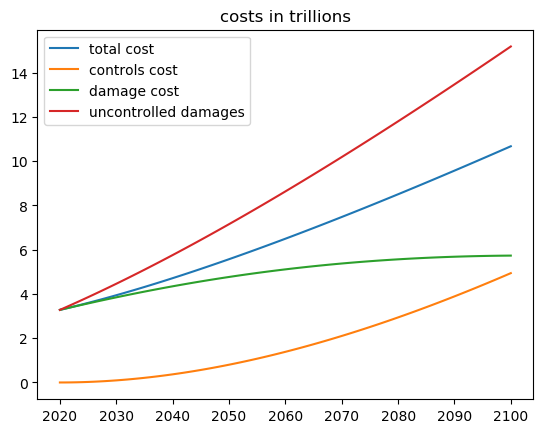

PyObject Text(0.5, 1, 'costs in trillions')

In [191]:
plot(t, total_cost, label="total cost")
plot(t, controls_cost, label="controls cost")
plot(t, damage_cost, label="damage cost")
plot(t, damage_cost_0, label="uncontrolled damages")
legend()
title("costs in trillions")